# Problema do Metrô de Paris com Algoritmo A*

Aluna: Monique Louise de Barros Monteiro - mlbm@cin.ufpe.br / moniquelouise@gmail.com

## Parte Manual

Cálculo de rotas - Problema do metrô de Paris

Queremos construir um sistema para auxiliar um usuário do metrô de Paris a saber o trajeto mais rápido entre a estação onde ele se encontra e a estação de destino. O usuário tem um painel com o mapa, podendo selecionar a sua estação de destino. O sistema então acende as luzes sobre o mapa mostrando o melhor trajeto a seguir.
Para simplificar o problema, consideramos apenas 4 linhas do metrô.

Considere que:
* a distância em linha reta entre duas estações quaisquer é dada pela tabela 1 e a distância real é dada pela tabela 2.
* a velocidade média de um trem é de 25km/h;
* o tempo gasto para trocar de linha dentro de mesma estação (fazer baldeação) é
considerado nulo (para facilitar).

1. Escolha uma função heurística para o problema escolhido.

A função heurística escolhida é a distância em linha reta entre a estação atual e a estação de destino final, cujos valores estão representados na tabela 1.

2. Formule o problema em termos de estado inicial, estado final, ações (e seus
custos) e função de avaliação para Busca com A*.

* Estado inicial: estação de origem
* Estado final: estado de destino
* Ações: deslocamentos entre estações consecutivas.
* Custos das ações: distâncias reais entre as estações consecutivas.
* Função da avaliação para busca: **f = g + h**, onde g é a soma das distâncias reais entre as estações consecutivvas do caminho da origem até a estação atual e h é a função heurística, ou seja, a distancia estimada (em linha reta) entre a estação atual e a estação de destino.

3. Desenhe os 3 níveis iniciais da árvore de busca (raiz e mais 2
níveis) – duas rodadas do algoritmo. Indique o estado do nó e seu custo (g+h), e
escreva a fronteira de cada nível.

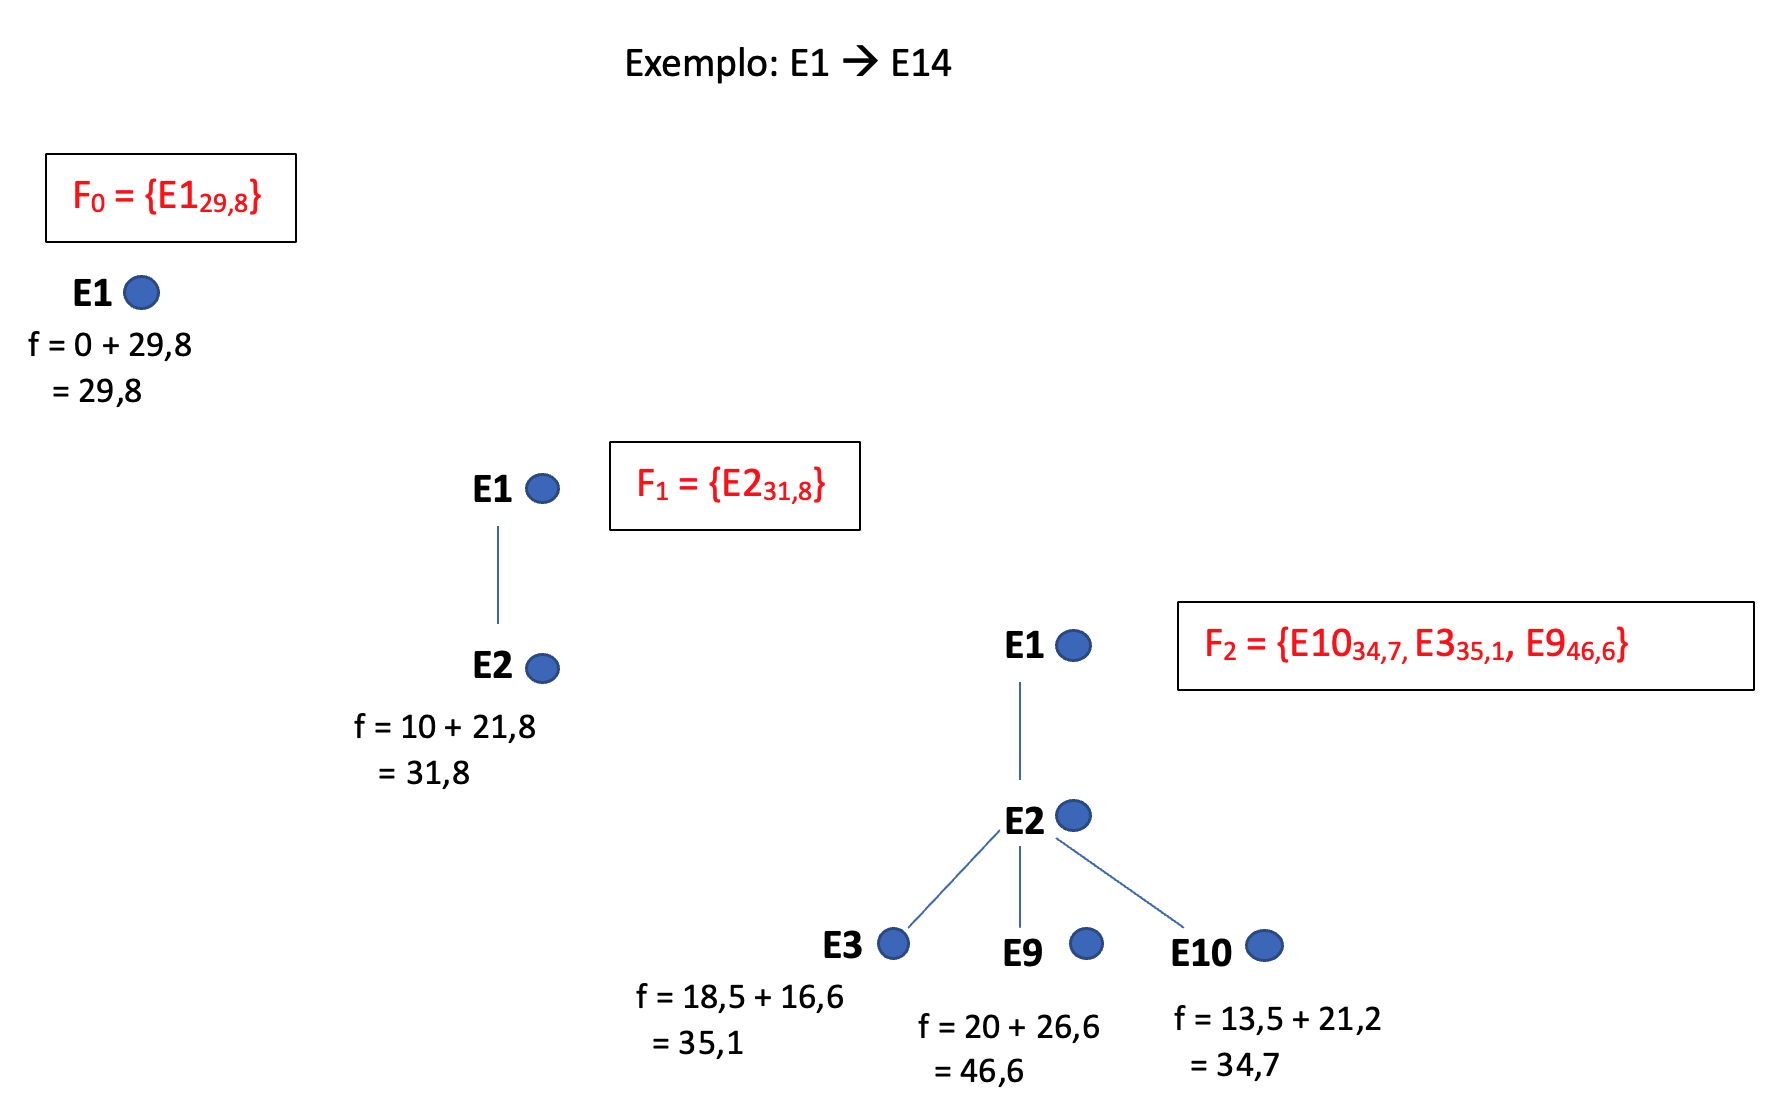

## Parte Automática (código-fonte + execução)

Matriz que representa as distâncias em linha reta entre as estações de metrô

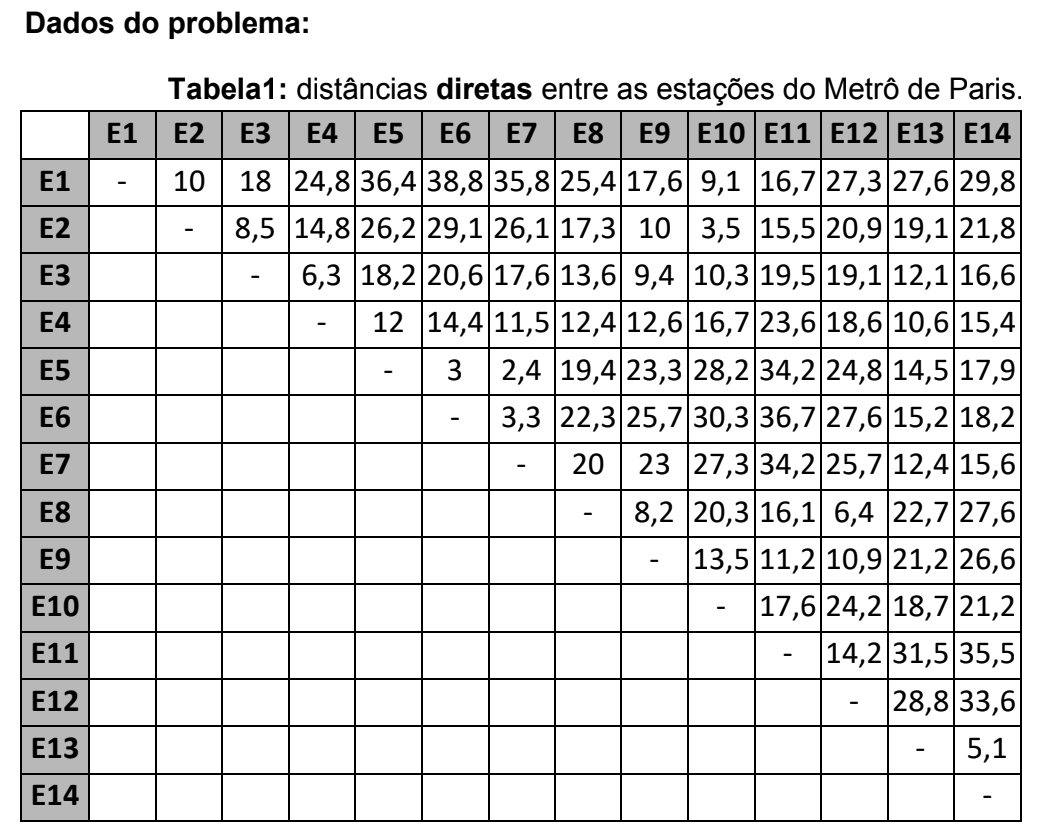

In [ ]:
import numpy as np

In [ ]:
distancias_diretas = np.array([[0, 10, 18, 24.8, 36.4, 38.8, 35.8, 25.4, 17.6, 9.1, 16.7, 27.3, 27.6, 29.8], 
                               [0, 0, 8.5, 14.8, 26.2, 29.1, 26.1, 17.3, 10, 3.5, 15.5, 20.9, 19.1, 21.8],
                               [0, 0, 0, 6.3, 18.2, 20.6, 17.6, 13.6, 9.4, 10.3, 19.5, 19.1, 12.1, 16.6],
                               [0, 0, 0, 0, 12, 14.4, 11.5, 12.4, 12.6, 16.7, 23.6, 18.6, 10.6, 15.4],
                               [0, 0, 0, 0, 0, 3, 2.4, 19.4, 23.3, 28.2, 34.2, 24.8, 14.5, 17.9],
                               [0, 0, 0, 0, 0, 0, 3.3, 22.3, 25.7, 30.3, 36.7, 27.6, 15.2, 18.2],
                               [0, 0, 0, 0, 0, 0, 0, 20, 23, 27.3, 34.2, 25.7, 12.4, 15.6],
                               [0, 0, 0, 0, 0, 0, 0, 0, 8.2, 20.3, 16.1, 6.4, 22.7, 27.6],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 13.5, 11.2, 10.9, 21.2, 26.6],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17.6, 24.2, 18.7, 21.2],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14.2, 31.5, 35.5],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28.8, 33.6],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.1],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                               ])

Soma a matriz com sua tranposta para obter uma matriz simétrica.

In [ ]:
distancias_diretas += distancias_diretas.T

Assegura-se de que a matriz resultante é simétrica

In [ ]:
assert np.allclose(distancias_diretas, distancias_diretas.T)

Matriz que representa as distâncias reais entre as estações de metrô

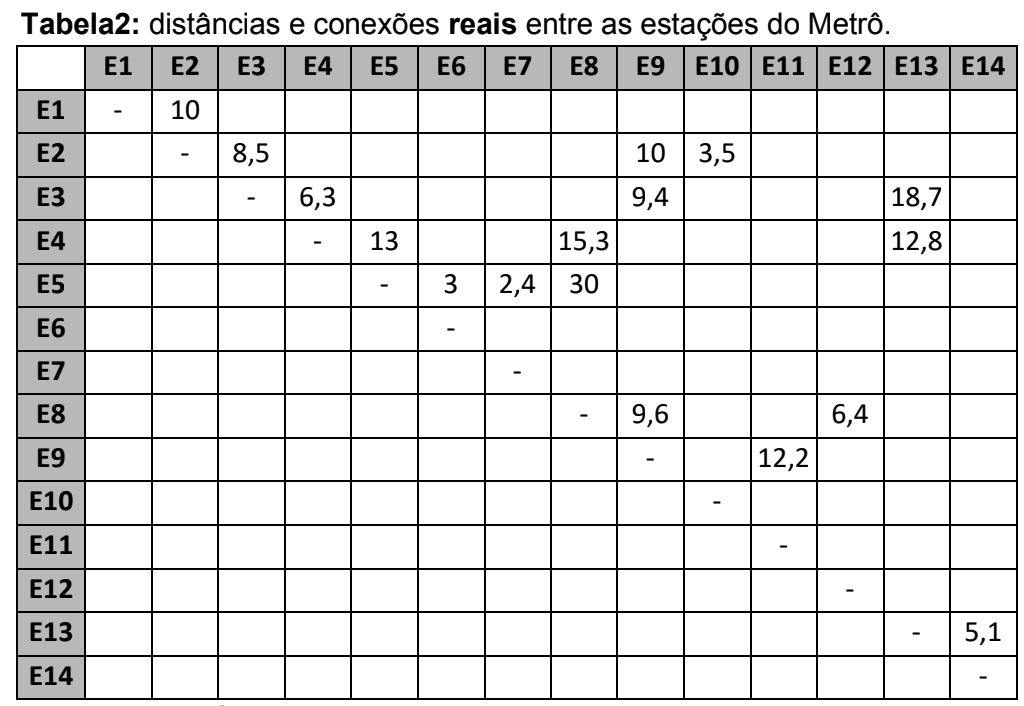

In [ ]:
distancias_reais = np.zeros((14,14))

In [ ]:
distancias_reais[0,1] = 10
distancias_reais[1,2] = 8.5
distancias_reais[1,8] = 10
distancias_reais[1,9] = 3.5
distancias_reais[2,3] = 6.3
distancias_reais[2,8] = 9.4
distancias_reais[2,12] = 18.7
distancias_reais[3,4] = 13
distancias_reais[3,7] = 15.3
distancias_reais[3,12] = 12.8
distancias_reais[4,5] = 3
distancias_reais[4,6] = 2.4
distancias_reais[4,7] = 30
distancias_reais[7,8] = 9.6
distancias_reais[7,11] = 6.4
distancias_reais[8,10] = 12.2
distancias_reais[12,13] = 5.1

Soma a matriz com sua tranposta para obter uma matriz simétrica.

In [ ]:
distancias_reais += distancias_reais.T

Assegura-se de que a matriz resultante é simétrica

In [ ]:
assert np.allclose(distancias_reais, distancias_reais.T)

A velocidade média de um trem é de 25km/h.

In [ ]:
VEL = 25

In [ ]:
class No:
  def __init__(self, estado:int, pai=None):
    #ie.: número de estação atual
    self.estado = estado

    #ie.: número da estação anterior
    self.pai = pai

    self.f = None

  def custo(self, estado_final:int):
    self.f = self.g() + self.h(estado_final)
    return self.f

  def g(self):
    if not self.pai:
      return 0
    return self.pai.g() + distancias_reais[self.pai.estado, self.estado]

  def h(self, estado_final:int):
    return distancias_diretas[self.estado, estado_final]

  def get_acoes(self):
    possiveis_destinos = distancias_reais[self.estado]
    expansao = []
    
    for i in range(possiveis_destinos.shape[0]):
      if possiveis_destinos[i] != 0 and (self.pai is None or i != self.pai.estado):
        no = No(i, self)
        expansao.append(no)
    
    return expansao

  def get_caminho(self):
    caminho = [self]
    
    if self.pai:
      caminho = self.pai.get_caminho() + caminho

    return caminho

  def __str__(self):
    return str(self.estado)

In [ ]:
def print_lista_nos(lista, p=True, imprimir_custos=True):
  retorno = ""
  for no in lista:
    custo = ""
    if imprimir_custos:
      custo = f", Custo={no.f}"

    retorno += f"[E{no.estado + 1}{custo}]"
  
  if p:
    print(retorno)
  
  return retorno

In [ ]:
def get_distancia_tempo_caminho(lista_nos):
  distancia = 0
  for no in lista_nos[::-1]:
    if no.pai:
      distancia += distancias_reais[no.estado, no.pai.estado]

  return distancia, distancia/VEL


In [ ]:
def calcular_melhor_caminho(estado_inicial:str, estado_final:str):
  estado_inicial = int(estado_inicial[1:]) - 1
  estado_final = int(estado_final[1:]) - 1
  no_inicial = No(estado_inicial)
  fronteira = [no_inicial]

  while(fronteira[0].estado != estado_final):
    print("Fronteira:")
    print_lista_nos(fronteira)

    #nó a expandir
    no = fronteira[0]
    expansao = no.get_acoes()

    #remove da fronteira o nó expadido
    fronteira.remove(no)

    #acrescenta os nós filhos à fronteira
    fronteira += expansao

    #ordena a fronteira
    fronteira = sorted(fronteira, key=lambda x:x.custo(estado_final))

  print("Fronteira final:")
  print_lista_nos(fronteira)

  caminho = fronteira[0].get_caminho()
  distancia, tempo = get_distancia_tempo_caminho(caminho)

  return print_lista_nos(caminho, False, False), distancia, tempo


### Casos de Teste

Dado o mapa abaixo, a seguir são executados um total de 28 casos de teste: 14 começando da estação 1 e 14 com pares aleatórios.

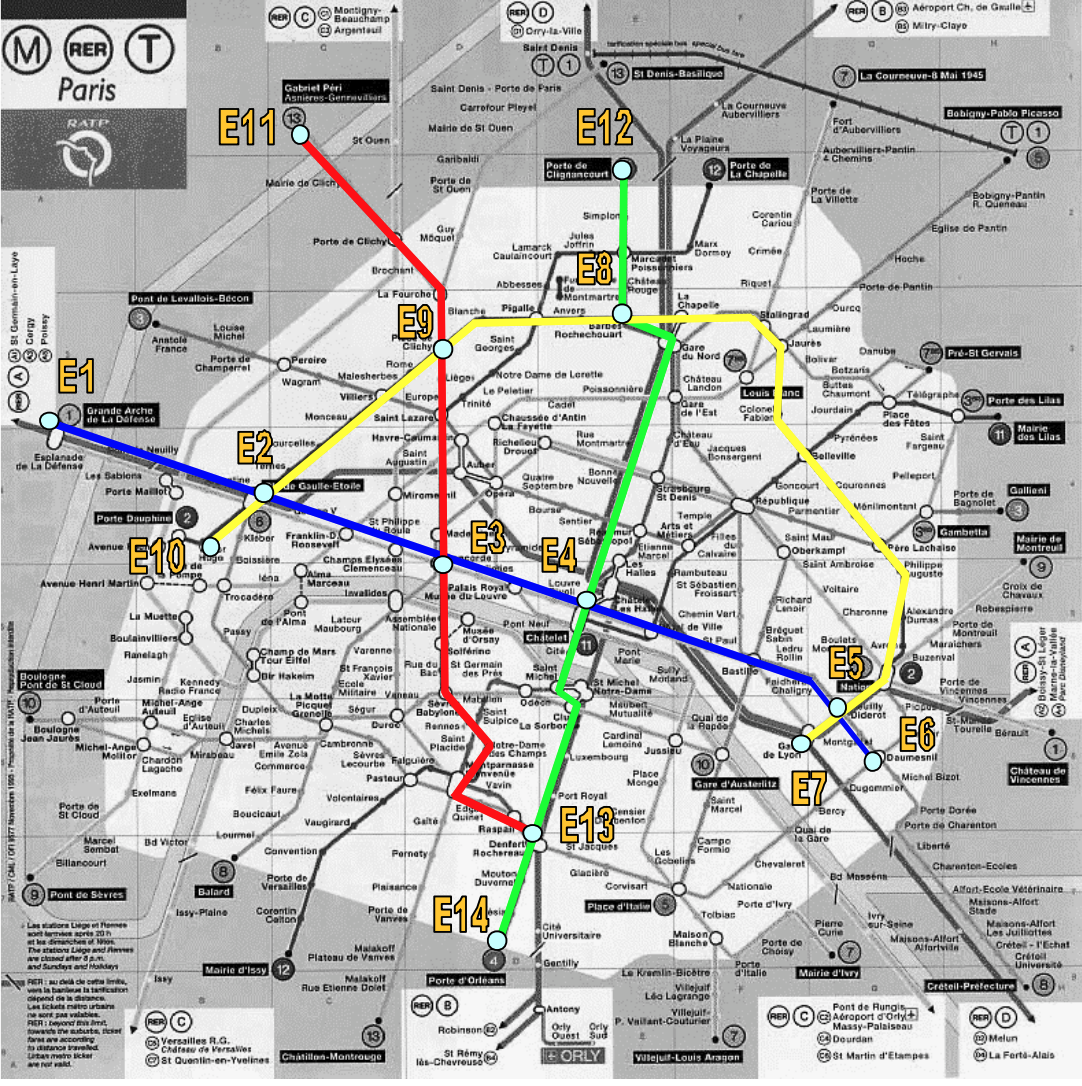

#### Casos de teste começando pela estação 1

In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E2")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira final:
[E2, Custo=10.0]
Caminho:  [E1][E2]
Distância (custo final encontrado):  10.0
Tempo: 0.4 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E3")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=18.5]
Fronteira final:
[E3, Custo=18.5][E10, Custo=23.8][E9, Custo=29.4]
Caminho:  [E1][E2][E3]
Distância (custo final encontrado):  18.5
Tempo: 0.74 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E4")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=24.8]
Fronteira:
[E3, Custo=24.8][E10, Custo=30.2][E9, Custo=32.6]
Fronteira final:
[E4, Custo=24.8][E10, Custo=30.2][E9, Custo=32.6][E9, Custo=40.5][E13, Custo=47.800000000000004]
Caminho:  [E1][E2][E3][E4]
Distância (custo final encontrado):  24.8
Tempo: 0.992 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E5")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=36.2]
Fronteira:
[E3, Custo=36.7][E10, Custo=41.7][E9, Custo=43.3]
Fronteira:
[E4, Custo=36.8][E10, Custo=41.7][E9, Custo=43.3][E9, Custo=51.2][E13, Custo=51.7]
Fronteira final:
[E5, Custo=37.8][E10, Custo=41.7][E9, Custo=43.3][E9, Custo=51.2][E13, Custo=51.7][E13, Custo=52.1][E8, Custo=59.5]
Caminho:  [E1][E2][E3][E4][E5]
Distância (custo final encontrado):  37.8
Tempo: 1.5119999999999998 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E6")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=39.1]
Fronteira:
[E3, Custo=39.1][E10, Custo=43.8][E9, Custo=45.7]
Fronteira:
[E4, Custo=39.2][E10, Custo=43.8][E9, Custo=45.7][E13, Custo=52.400000000000006][E9, Custo=53.599999999999994]
Fronteira:
[E5, Custo=40.8][E10, Custo=43.8][E9, Custo=45.7][E13, Custo=52.400000000000006][E13, Custo=52.8][E9, Custo=53.599999999999994][E8, Custo=62.400000000000006]
Fronteira final:
[E6, Custo=40.8][E7, Custo=43.49999999999999][E10, Custo=43.8][E9, Custo=45.7][E13, Custo=52.400000000000006][E13, Custo=52.8][E9, Custo=53.599999999999994][E8, Custo=62.400000000000006][E8, Custo=90.1]
Caminho:  [E1][E2][E3][E4][E5][E6]
Distância (custo final encontrado):  40.8
Tempo: 1.632 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E7")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=36.1]
Fronteira:
[E3, Custo=36.1][E10, Custo=40.8][E9, Custo=43.0]
Fronteira:
[E4, Custo=36.3][E10, Custo=40.8][E9, Custo=43.0][E13, Custo=49.6][E9, Custo=50.9]
Fronteira:
[E5, Custo=40.199999999999996][E10, Custo=40.8][E9, Custo=43.0][E13, Custo=49.6][E13, Custo=50.0][E9, Custo=50.9][E8, Custo=60.1]
Fronteira final:
[E7, Custo=40.199999999999996][E10, Custo=40.8][E9, Custo=43.0][E6, Custo=44.099999999999994][E13, Custo=49.6][E13, Custo=50.0][E9, Custo=50.9][E8, Custo=60.1][E8, Custo=87.8]
Caminho:  [E1][E2][E3][E4][E5][E7]
Distância (custo final encontrado):  40.2
Tempo: 1.608 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E8")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=27.3]
Fronteira:
[E9, Custo=28.2][E3, Custo=32.1][E10, Custo=33.8]
Fronteira final:
[E8, Custo=29.6][E3, Custo=32.1][E10, Custo=33.8][E3, Custo=43.0][E11, Custo=48.300000000000004]
Caminho:  [E1][E2][E9][E8]
Distância (custo final encontrado):  29.6
Tempo: 1.1840000000000002 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E9")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=20.0]
Fronteira final:
[E9, Custo=20.0][E10, Custo=27.0][E3, Custo=27.9]
Caminho:  [E1][E2][E9]
Distância (custo final encontrado):  20.0
Tempo: 0.8 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E10")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=13.5]
Fronteira final:
[E10, Custo=13.5][E3, Custo=28.8][E9, Custo=33.5]
Caminho:  [E1][E2][E10]
Distância (custo final encontrado):  13.5
Tempo: 0.54 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E11")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=25.5]
Fronteira:
[E10, Custo=31.1][E9, Custo=31.2][E3, Custo=38.0]
Fronteira:
[E9, Custo=31.2][E3, Custo=38.0]
Fronteira final:
[E11, Custo=32.2][E3, Custo=38.0][E8, Custo=45.7][E3, Custo=48.9]
Caminho:  [E1][E2][E9][E11]
Distância (custo final encontrado):  32.2
Tempo: 1.288 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E12")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=30.9]
Fronteira:
[E9, Custo=30.9][E3, Custo=37.6][E10, Custo=37.7]
Fronteira:
[E8, Custo=36.0][E3, Custo=37.6][E10, Custo=37.7][E11, Custo=46.400000000000006][E3, Custo=48.5]
Fronteira final:
[E12, Custo=36.0][E3, Custo=37.6][E10, Custo=37.7][E11, Custo=46.400000000000006][E3, Custo=48.5][E4, Custo=63.50000000000001][E5, Custo=84.4]
Caminho:  [E1][E2][E9][E8][E12]
Distância (custo final encontrado):  36.0
Tempo: 1.44 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E13")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=29.1]
Fronteira:
[E3, Custo=30.6][E10, Custo=32.2][E9, Custo=41.2]
Fronteira:
[E10, Custo=32.2][E4, Custo=35.4][E13, Custo=37.2][E9, Custo=41.2][E9, Custo=49.099999999999994]
Fronteira:
[E4, Custo=35.4][E13, Custo=37.2][E9, Custo=41.2][E9, Custo=49.099999999999994]
Fronteira final:
[E13, Custo=37.2][E13, Custo=37.6][E9, Custo=41.2][E9, Custo=49.099999999999994][E5, Custo=52.3][E8, Custo=62.8]
Caminho:  [E1][E2][E3][E13]
Distância (custo final encontrado):  37.2
Tempo: 1.4880000000000002 hora(s)


In [ ]:
caminho, distancia, tempo = calcular_melhor_caminho("E1","E14")
print("Caminho: ", caminho)
print("Distância (custo final encontrado): ", distancia)
print(f"Tempo: {tempo} hora(s)")

Fronteira:
[E1, Custo=None]
Fronteira:
[E2, Custo=31.8]
Fronteira:
[E10, Custo=34.7][E3, Custo=35.1][E9, Custo=46.6]
Fronteira:
[E3, Custo=35.1][E9, Custo=46.6]
Fronteira:
[E4, Custo=40.2][E13, Custo=42.300000000000004][E9, Custo=46.6][E9, Custo=54.5]
Fronteira:
[E13, Custo=42.300000000000004][E13, Custo=42.7][E9, Custo=46.6][E9, Custo=54.5][E5, Custo=55.699999999999996][E8, Custo=67.7]
Fronteira final:
[E14, Custo=42.300000000000004][E13, Custo=42.7][E9, Custo=46.6][E9, Custo=54.5][E5, Custo=55.699999999999996][E4, Custo=65.4][E8, Custo=67.7]
Caminho:  [E1][E2][E3][E13][E14]
Distância (custo final encontrado):  42.3
Tempo: 1.692 hora(s)


#### Casos de teste aleatórios

In [ ]:
estacoes = ["E1","E2","E3","E4","E5","E6","E7","E8","E9","E10","E11","E12","E13","E14"]

In [ ]:
import random

for _ in range(14):
  origem, destino = random.sample(estacoes, 2)
  print(f"Origem: {origem}, Destino: {destino}")
  caminho, distancia, tempo = calcular_melhor_caminho(origem, destino)
  print("Caminho: ", caminho)
  print("Distância (custo final encontrado): ", distancia)
  print(f"Tempo: {tempo} hora(s)")
  print()

Origem: E13, Destino: E10
Fronteira:
[E13, Custo=None]
Fronteira:
[E14, Custo=26.299999999999997][E3, Custo=29.0][E4, Custo=29.5]
Fronteira:
[E3, Custo=29.0][E4, Custo=29.5]
Fronteira:
[E4, Custo=29.5][E2, Custo=30.7][E9, Custo=41.6][E4, Custo=41.7]
Fronteira:
[E3, Custo=29.400000000000002][E2, Custo=30.7][E9, Custo=41.6][E4, Custo=41.7][E8, Custo=48.400000000000006][E5, Custo=54.0]
Fronteira:
[E2, Custo=30.7][E2, Custo=31.1][E9, Custo=41.6][E4, Custo=41.7][E9, Custo=42.0][E8, Custo=48.400000000000006][E5, Custo=54.0][E13, Custo=56.5]
Fronteira final:
[E10, Custo=30.7][E2, Custo=31.1][E9, Custo=41.6][E4, Custo=41.7][E9, Custo=42.0][E1, Custo=46.300000000000004][E8, Custo=48.400000000000006][E9, Custo=50.7][E5, Custo=54.0][E13, Custo=56.5]
Caminho:  [E13][E3][E2][E10]
Distância (custo final encontrado):  30.7
Tempo: 1.228 hora(s)

Origem: E13, Destino: E7
Fronteira:
[E13, Custo=None]
Fronteira:
[E14, Custo=20.7][E4, Custo=24.3][E3, Custo=36.3]
Fronteira:
[E4, Custo=24.3][E3, Custo=36.3]